# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [98]:
#show statistics on a y data set
import matplotlib.pyplot as plt

def showStatsOfSet(y_train, title):
    nrPerBin = np.bincount(y_train)
    plt.hist(y_train, bins = np.amax(y_train)+1 )  # plt.hist passes it's arguments to np.histogram
    plt.title(title)
    plt.show()
    print("abs. number of training data in each label: ", nrPerBin)
    print('sum: ', np.sum(nrPerBin))

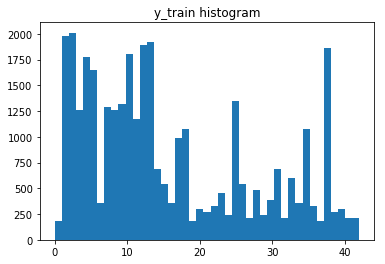

abs. number of training data in each label:  [ 180 1980 2010 1260 1770 1650  360 1290 1260 1320 1800 1170 1890 1920  690
  540  360  990 1080  180  300  270  330  450  240 1350  540  210  480  240
  390  690  210  599  360 1080  330  180 1860  270  300  210  210]
sum:  34799


In [99]:
# Load pickled data
import pickle
import numpy as np
import cv2
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import PIL


# TODO: Fill this in based on where you saved the training and testing data

training_file = "train.p"
valid_file = "valid.p"
testing_file = "test.p"
training_file_extend = "train_extended.p" ##additional data can get created further down in the notebook.


with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
with open(valid_file,mode='rb') as f:
    valid = pickle.load(f)
X_train, y_train = train['features'], train['labels']
X_validation,y_validation =valid['features'],valid['labels']  
X_test, y_test = test['features'], test['labels']

X_train, y_train = shuffle(X_train, y_train)
X_validation,y_validation = shuffle(X_validation,y_validation)
X_test, y_test = shuffle(X_test, y_test)



## Split train into train and a new validation set
#X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=0)


showStatsOfSet(y_train, "y_train histogram")

use_extended_data = False
if (use_extended_data):
    with open(training_file_extend, mode='rb') as f:
        train_extend = pickle.load(f)

    X_train, y_train = train_extend['features'], train_extend['labels']
    X_train, y_train = shuffle(X_train, y_train)
    showStatsOfSet(y_train, "y_train histogram after adding extended data")
    
    
#normalizing X
X_train = X_train.astype('float32')
X_validation = X_validation.astype('float32')
X_test = X_test.astype('float32')
#plt.imshow(X_train[0])
X_train = X_train / 255 - 0.5
X_validation = X_validation / 255 - 0.5
X_test = X_test / 255 - 0.5
#plt.imshow(X_train[0])

In [100]:

### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: Number of testing examples.
n_validation = X_validation.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = np.max(y_train)+1

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Number of validation examples =", n_validation)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)



Number of training examples = 34799
Number of testing examples = 12630
Number of validation examples = 4410
Image data shape = (32, 32, 3)
Number of classes = 43


In [101]:
import random

def convertToGrayscale(data):    
    for index in range(0,data.shape[0]):
        for channel in range(0,2):
            data[index,:,:,channel]= cv2.cvtColor(data[index], cv2.COLOR_BGR2GRAY)
    return data[:,:,:,0:1]


In [102]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.


# Visualizations will be shown in the notebook.
%matplotlib inline
import random
%matplotlib inline
import matplotlib.gridspec as gridspec

useGrayscale = True
if (useGrayscale):
    X_train = convertToGrayscale(X_train)
    X_validation = convertToGrayscale(X_validation)
    X_test = convertToGrayscale(X_test)


In [90]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.

###already pre-processed in Step 0


##SETUP TENSORFLOW
import tensorflow as tf

EPOCHS = 10
BATCH_SIZE = 128

In [91]:
#example

from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma)) #a little change
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)
    
    #Add Dropout Layer


    
    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    conv1 = tf.nn.dropout(conv1, keep_prob)
    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)


    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    conv2 = tf.nn.dropout(conv2, keep_prob)
    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 10.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

In [92]:
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)
keep_prob = tf.placeholder(tf.float32)

In [93]:
#TRAINING
rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [94]:
#MODEL EVALUATION
y_pred = tf.nn.softmax(logits)
topFive = tf.nn.top_k(y_pred, k=3, sorted=True, name=None)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [95]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
            
        validation_accuracy = evaluate(X_validation, y_validation)
#        own_test_accuracy = evaluate(X_test_own, y_test_own)

        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        #print("Test_Own Accuracy = {:.3f}".format(own_test_accuracy))

        print()
        
    saver.save(sess, 'lenet_traffic_sign')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.538

EPOCH 2 ...
Validation Accuracy = 0.726

EPOCH 3 ...
Validation Accuracy = 0.794

EPOCH 4 ...
Validation Accuracy = 0.819

EPOCH 5 ...
Validation Accuracy = 0.841

EPOCH 6 ...
Validation Accuracy = 0.853

EPOCH 7 ...
Validation Accuracy = 0.862

EPOCH 8 ...
Validation Accuracy = 0.880

EPOCH 9 ...
Validation Accuracy = 0.878

EPOCH 10 ...
Validation Accuracy = 0.884

Model saved


In [67]:
##EVALUATION

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.877


### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [ ]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

In [ ]:
"""

def transform_image(img,ang_range,shear_range,trans_range):
    
    This function transforms images to generate new images.
    The function takes in following arguments,
    1- Image
    2- ang_range: Range of angles for rotation
    3- shear_range: Range of values to apply affine transform to (https://code.tutsplus.com/tutorials/understanding-affine-transformations-with-matrix-mathematics--active-10884)
    4- trans_range: Range of values to apply translations over. 
    
    A Random uniform distribution is used to generate different parameters for transformation
    
    '''
    # Rotation

    ang_rot = np.random.uniform(ang_range)-ang_range/2
    rows,cols,ch = img.shape    
    Rot_M = cv2.getRotationMatrix2D((cols/2,rows/2),ang_rot,1)

    # Translation
    tr_x = trans_range*np.random.uniform()-trans_range/2
    tr_y = trans_range*np.random.uniform()-trans_range/2
    Trans_M = np.float32([[1,0,tr_x],[0,1,tr_y]])

    # Shear
    pts1 = np.float32([[5,5],[20,5],[5,20]])

    pt1 = 5+shear_range*np.random.uniform()-shear_range/2
    pt2 = 20+shear_range*np.random.uniform()-shear_range/2

    pts2 = np.float32([[pt1,5],[pt2,pt1],[5,pt2]])

    shear_M = cv2.getAffineTransform(pts1,pts2)
        
    img = cv2.warpAffine(img,Rot_M,(cols,rows))
    img = cv2.warpAffine(img,Trans_M,(cols,rows))
    img = cv2.warpAffine(img,shear_M,(cols,rows))
    
    return img  


def addNewData(X_train, y_train, binSize):
    '''takes in x training data and adds generated data to it 
    until each bin has a certain size; it calls 'transform_image' method
    e.g. binSize = 1000 means that we will add images until each bin has at least a size of 1000
    '''
    
    # generates how many samples we still need per bin; Example data_per_bin[0]=4200 means we still have to generate 4200 data samples for bin 0
    data_per_bin = np.full(len(np.bincount(y_train)), binSize, dtype=int) - np.bincount(y_train)
    gs1 = gridspec.GridSpec(10, 10)
    gs1.update(wspace=0.01, hspace=0.02) # set the spacing between axes. 
    plt.figure(figsize=(12,12))
    
    # iterates over each bin
    for index in range(0, len(data_per_bin)):
        
        array_of_index = np.where(y_train==index)[0]
        print("Generating additional Data for following label: ", index) 
        print("Nr. of additional images per label that are being created:  ", data_per_bin[index]) 


        #adds data samples until bin size of respective bin has reached 'binSize'
        while data_per_bin[index] > 0:
            new_generated_pic_index = random.choice(array_of_index)
            img = transform_image(X_train[new_generated_pic_index],20,10,5)
            X_test_new_img = np.empty(shape=[1, 32,32,3])
            X_test_new_img = X_test_new_img.astype('uint8')
            X_test_new_img[0] = img
        
            X_train = np.vstack((X_train, X_test_new_img))
            y_train = np.append(y_train,index)
            data_per_bin[index] = data_per_bin[index]-1
            print("Image created for label: ", index) 
            print("Nr. of additional images remaining:  ", data_per_bin[index]) 
            
    plt.show()   
    return X_train, y_train
"""

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [ ]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

In [ ]:
"""
import cv2
import numpy as np
### converting to grayscale, etc.
def normalize(sample):
    sample = sample/255-0.5
    sample = np.array(sample,dtype = np.float32)
    return sample

def bat_convert2gray(sample_batch):
    gray_sample=[]
    for sample in sample_batch:
        gray = cv2.cvtColor(sample,cv2.COLOR_RGB2GRAY)        
        gray_sample.append(gray)
    gray_sample = np.array(gray_sample)
    gray_sample = gray_sample.reshape(-1,32,32,1)
    return gray_sample
### Feel free to use as many code cells as needed.
#convert to grayscal

normal_gray_X_train = normalize(X_train)
normal_gray_X_valid = normalize(X_valid)
normal_gray_X_test = normalize(X_test)

gray_X_train = bat_convert2gray(normal_gray_X_train)
gray_X_valid = bat_convert2gray(normal_gray_X_valid)
gray_X_test = bat_convert2gray(normal_gray_X_test)
#gray_X_train = gray_X_train.astype('float32')
#gray_X_valid = gray_X_valid.astype('float32')
#gray_X_test = gray_X_test.astype('float32')
"""

In [ ]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: Number of testing examples.
n_validation = X_validation.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = np.max(y_train)+1

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Number of validation examples =", n_validation)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

In [ ]:
'''
#data process

# Load pickled data
import pickle
import numpy as np
import cv2
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import PIL


# TODO: Fill this in based on where you saved the training and testing data

training_file = "train.p"
testing_file = "test.p"
training_file_extend = "train_extended.p" ##additional data can get created further down in the notebook.


with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

X_train, y_train = shuffle(X_train, y_train)
X_test, y_test = shuffle(X_test, y_test)



## Split train into train and a new validation set
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=0)


#showStatsOfSet(y_train, "y_train histogram")

use_extended_data = False
if (use_extended_data):
    with open(training_file_extend, mode='rb') as f:
        train_extend = pickle.load(f)

    X_train, y_train = train_extend['features'], train_extend['labels']
    X_train, y_train = shuffle(X_train, y_train)
    #showStatsOfSet(y_train, "y_train histogram after adding extended data")

    
#normalizing X
X_train = X_train.astype('float32')
X_validation = X_validation.astype('float32')
X_test = X_test.astype('float32')

X_train = X_train / 255 - 0.5
X_validation = X_validation / 255 - 0.5
X_test = X_test / 255 - 0.5
'''
import random

def convertToGrayscale(data):
    for index in range(0,data.shape[0]):
        for channel in range(0,2):
            data[index,:,:,0]= cv2.cvtColor(data[index], cv2.COLOR_BGR2GRAY)
    return data



# Visualizations will be shown in the notebook.
%matplotlib inline
import random
%matplotlib inline
import matplotlib.gridspec as gridspec

useGrayscale = True
if (useGrayscale):
    X_train = convertToGrayscale(X_train)
    X_validation = convertToGrayscale(X_validation)
    X_test = convertToGrayscale(X_test)

useYUV = False
if (useYUV):
    X_train = convertToYUV(X_train)
    X_validation = convertToYUV(X_validation)
    X_test = convertToYUV(X_test)


#showStatsOfSet(y_train, "before")

addNewDataBoolean = False

# adds new data to X_train and y_train and saves the new+old data to a file
if (addNewDataBoolean):
    X_train, y_train = addNewData(X_train, y_train, 1000)
    #showStatsOfSet(y_train, "after")
    pickle_file = { "features": X_train, "labels": y_train }

    with open("train_extended.p", 'wb') as handle:
        pickle.dump(pickle_file, handle, protocol=pickle.HIGHEST_PROTOCOL)
    print(X_train.shape)


### Model Architecture

In [ ]:
'''
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf

EPOCHS = 10
BATCH_SIZE = 128


from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)
    
    #Add Dropout Layer
    conv1 = tf.nn.dropout(conv1, keep_prob)

    
    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 10.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits
'''

In [ ]:

#example

from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma)) #a little change
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)
    
    #Add Dropout Layer
#    conv1 = tf.nn.dropout(conv1, keep_prob)

    
    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 10.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits


In [ ]:

'''
x = tf.placeholder(tf.float32,(None,32,32,3))
y = tf.placeholder(tf.int32,(None))
one_hot_y = tf.one_hot(y,43)
keep_prob = tf.placeholder(tf.float32)


# ### Train, Validate and Test the Model

rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)
'''



In [ ]:
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)
keep_prob = tf.placeholder(tf.float32)

In [ ]:
#TRAINING
rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [ ]:
#MODEL EVALUATION
y_pred = tf.nn.softmax(logits)
topFive = tf.nn.top_k(y_pred, k=3, sorted=True, name=None)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [ ]:
'''
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y,keep_prob: 1})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

'''

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [ ]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.
'''

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(gray_X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            #sess.run(print(batch_x.shape))
            sess.run(training_operation, feed_dict={x: batch_x, 
                                                    y: batch_y})
            
        #validation_accuracy = evaluate(X_validation, y_validation)
        validation_accuracy = evaluate(gray_X_valid, y_valid)
        #train_accuracy = evaluate(gray_X_train,y_train)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        #print("train Accuracy = {:.3f}".format(train_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")
'''

In [52]:

#example_code
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y,keep_prob:0.5})
            
        validation_accuracy = evaluate(X_valid, y_valid)
#        own_test_accuracy = evaluate(X_test_own, y_test_own)

        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        #print("Test_Own Accuracy = {:.3f}".format(own_test_accuracy))

        print()
        
    saver.save(sess, 'lenet_traffic_sign')
    print("Model saved")


NameError: name 'tf' is not defined

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [83]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
from os import walk,path

files = []
image_dir = "new_image"
for dirpath,dirnames,filenames in walk(image_dir):
    files.extend(filenames)
#print(files)
image_data = np.zeros(shape=[len(files),32,32,4])
X_newtest = np.zeros(shape=[len(files),32,32,3])
y_newtest = np.zeros(shape=[len(files)])
   
for index,file in enumerate(files):
    image_data[index]= mpimg.imread(image_dir+"/"+file)
    #print(mpimg.imread(image_dir+"/"+file).shape)
    label,extend= path.splitext(file)
    y_newtest[index] = int(label)

X_newtest=image_data[:,:,:,0:3]
X_newtest = X_newtest.astype('float32')
print(X_newtest)
#X_newtest =X_newtest / 255 - 0.5
#plt.imshow(X_newtest[0])
#X_newtest = convertToGrayscale(X_newtest)
#plt.imshow(X_newtest[0])
#X_newtest =X_newtest / 255 - 0.5
#plt.imshow(X_newtest[0])

[[[[ 1.          1.          1.        ]
   [ 1.          1.          1.        ]
   [ 1.          1.          1.        ]
   ..., 
   [ 1.          1.          1.        ]
   [ 1.          1.          1.        ]
   [ 1.          1.          1.        ]]

  [[ 1.          1.          1.        ]
   [ 1.          1.          1.        ]
   [ 1.          1.          1.        ]
   ..., 
   [ 1.          1.          1.        ]
   [ 1.          1.          1.        ]
   [ 1.          1.          1.        ]]

  [[ 1.          1.          1.        ]
   [ 1.          1.          1.        ]
   [ 1.          1.          1.        ]
   ..., 
   [ 0.99607843  0.99607843  0.98823529]
   [ 0.99607843  0.99215686  0.99607843]
   [ 1.          1.          1.        ]]

  ..., 
  [[ 1.          1.          1.        ]
   [ 0.99607843  0.99607843  0.99607843]
   [ 0.99215686  0.99607843  0.99607843]
   ..., 
   [ 0.98823529  0.99607843  0.99607843]
   [ 1.          0.99607843  0.97647059]
   [ 1.

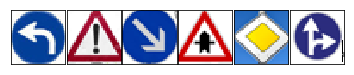

In [77]:
w=len(files)
fig = plt.figure(figsize=(w,1))
gs=gridspec.GridSpec(1,w,wspace=0.0,hspace=0.0)

#test_images=np.zeros([len(image_files),32,32,1])
for i in range (w):
    ax = plt.subplot(gs[0,i])
    #image=(mpimg.imread('new_image/'+files[i])*255).astype('uint8')
    ax.set_xticks([])
    ax.set_yticks([])
    fig.add_subplot(ax)
    #image_gray=cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
    #image_gray=image_gray.reshape(image_gray.shape+(1,))
    #test_images[i,]=normalize(image_gray)
    #X_newtest=X_newtest.reshap(X_newtest.shape+(1,))
    ax.imshow(X_newtest[i])
    #ax.imshow(image_gray)
plt.show()
    

### Predict the Sign Type for Each Image

In [78]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_newtest, y_newtest)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 1.000


### Analyze Performance

In [ ]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [79]:

import csv

signNames = []
with open('signnames.csv') as signfile:    
    reader = csv.reader(signfile)
    next(reader, None) #skip the header
    signNames = list(reader)

print('\n'.join([i + ': ' + s  for [i, s] in signNames]))  
#store in a dictionary for easy use later
signDict = dict(signNames)


0: Speed limit (20km/h)
1: Speed limit (30km/h)
2: Speed limit (50km/h)
3: Speed limit (60km/h)
4: Speed limit (70km/h)
5: Speed limit (80km/h)
6: End of speed limit (80km/h)
7: Speed limit (100km/h)
8: Speed limit (120km/h)
9: No passing
10: No passing for vehicles over 3.5 metric tons
11: Right-of-way at the next intersection
12: Priority road
13: Yield
14: Stop
15: No vehicles
16: Vehicles over 3.5 metric tons prohibited
17: No entry
18: General caution
19: Dangerous curve to the left
20: Dangerous curve to the right
21: Double curve
22: Bumpy road
23: Slippery road
24: Road narrows on the right
25: Road work
26: Traffic signals
27: Pedestrians
28: Children crossing
29: Bicycles crossing
30: Beware of ice/snow
31: Wild animals crossing
32: End of all speed and passing limits
33: Turn right ahead
34: Turn left ahead
35: Ahead only
36: Go straight or right
37: Go straight or left
38: Keep right
39: Keep left
40: Roundabout mandatory
41: End of no passing
42: End of no passing by vehic

In [81]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    
    pred_op = tf.nn.top_k(tf.nn.softmax(logits), k=5) #[1][0]
    pred = sess.run(pred_op, feed_dict={x: X_newtest, keep_prob: 1})    
    
for i in range(len(files)):
    print("Top 5 class predictions for {}:".format(files[i]))
    for j in range(5):    
        print("\tclass ID: {}, label: {}, probability: {}".format(pred[1][i][j], signDict[str(pred[1][i][j])], pred[0][i][j]))  

Top 5 class predictions for 34.png:
	class ID: 34, label: Turn left ahead, probability: 0.999984860420227
	class ID: 38, label: Keep right, probability: 9.245467481378e-06
	class ID: 35, label: Ahead only, probability: 4.258090939401882e-06
	class ID: 33, label: Turn right ahead, probability: 6.57652947211318e-07
	class ID: 32, label: End of all speed and passing limits, probability: 6.22457378085528e-07
Top 5 class predictions for 18.png:
	class ID: 18, label: General caution, probability: 0.9595256447792053
	class ID: 26, label: Traffic signals, probability: 0.02653183415532112
	class ID: 28, label: Children crossing, probability: 0.010496401228010654
	class ID: 27, label: Pedestrians, probability: 0.003199196420609951
	class ID: 4, label: Speed limit (70km/h), probability: 8.90181036083959e-05
Top 5 class predictions for 38.png:
	class ID: 38, label: Keep right, probability: 0.9999998807907104
	class ID: 34, label: Turn left ahead, probability: 9.696438496575865e-08
	class ID: 36, l

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [82]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")